# 머신러닝 소개, scikit-learn 패키지 사용법

In [395]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

## 논리곱(AND)
* 둘 모두 참이어야 참
* 머신러닝에서 A, B가 모델에 입력되는 속성이고, 결과가 모델로부터 나타나는 결과

|A|B|결과|
|:-:|:-:|:-:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

In [172]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0,0,0,1]

X = np.array(X)
y = np.array(y)

In [173]:
X.shape, y.shape

((4, 2), (4,))

In [174]:
X[:,0], X[:,1]

(array([0, 0, 1, 1]), array([0, 1, 0, 1]))

* AND 연산은 선형 분리 가능
  * 직선 한 개로 분리 가능하다는 의미
  * 즉, 아래 그림과 같이 $y > -x + 1.5$ 참이면 1, 아니면 0
  * A, B 를 각각 $(x, y)$ 에 대입해보자.
  * (참고) $y = -x + 1.5$ 와 같은 식을 decision boundary 라고 부름

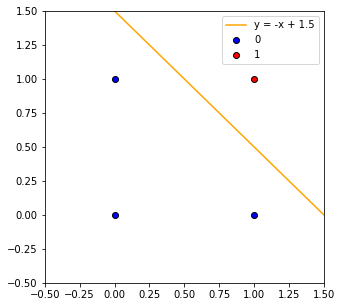

In [326]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
x = np.linspace(-2, 2, 100)
plt.scatter(X[:, 0][:3], X[:, 1][:3], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='red', edgecolor='k', label=1)
plt.plot(x, -x + 1.5, color='orange',label='y = -x + 1.5')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.show()

## 논리합(OR)
* 둘 중 하나라도 참이면 참

|A|B|결과|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [169]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0,1,1,1]

X = np.array(X)
y = np.array(y)

* OR 연산 또한 선형 분리 가능
  * 즉, 아래 그림과 같이 $y > -x + 0.5$ 참이면 1, 아니면 0
  * A, B 를 각각 $(x, y)$ 에 대입해보자.

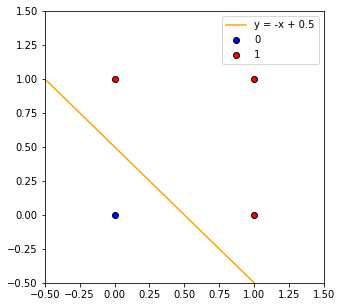

In [327]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
x = np.linspace(-2, 2, 100)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:], X[:, 1][1:], color='red', edgecolor='k', label=1)
plt.plot(x, -x + .5, color='orange',label='y = -x + 0.5')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.show()

## 머신러닝은?
* 분류 문제에서 머신러닝이란 클래스를 나누어주는 decision boundary 를 찾아가는 과정

## 배타적논리합(XOR)
* 둘 중 하나만 참이어야 참

|A|B|결과|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [191]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [0,1,1,0]

X = np.array(X)
y = np.array(y)

* XOR 연산은 선형 분리 불가능
  * 1차 함수 하나로 분리가 불가능

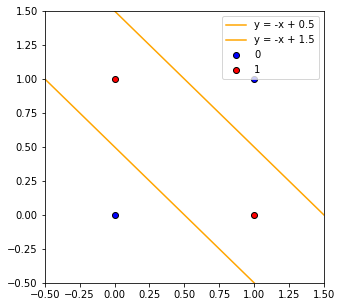

In [328]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
x = np.linspace(-2, 2, 100)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:3], X[:, 1][1:3], color='red', edgecolor='k', label=1)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='blue', edgecolor='k')
plt.plot(x, -x + .5, color='orange',label='y = -x + 0.5')
plt.plot(x, -x + 1.5, color='orange',label='y = -x + 1.5')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.show()

## 서포트 벡터 머신 (support vector machine, SVM)
* 모델이름.fit(X, y) : X 속성에 해당하는 y 클래스로 분류하는 모델 학습
* 모델이름.predict(new_X) : 새롭게 관측한 new_X 속성을 갖는 데이터가 어떤 클래스에 속하는지 분류
* 데이터가 선형분리 된다는 가정으로 모델을 만들면?

In [319]:
# kernel = 'linear' 는 데이터가 선형 분리 될 때 사용
svc_linear = SVC(kernel='linear').fit(X, y)
y_pred = svc_linear.predict(X)
print(y_pred)

[1 1 1 1]


In [320]:
# 이해 안되는 코드는 일단 넘어갈 것
XX, YY = np.meshgrid(np.linspace(-.5, 1.5, 100), np.linspace(-.5, 1.5, 100))
temp = np.zeros((len(XX.flatten()), 2))
temp[:, 0] = XX.flatten()
temp[:, 1] = YY.flatten()

ZZ = svc_linear.predict(temp)
ZZ = np.reshape(ZZ, XX.shape)

* 모델이 0으로 판단하는지 1로 판단하는지에 따라 색상 차이

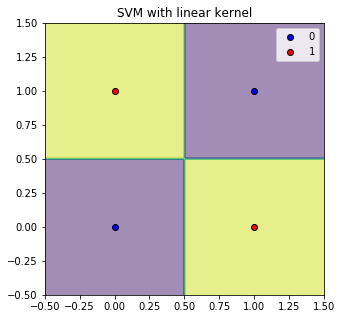

In [329]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
plt.contourf(XX, YY, ZZ, alpha=.5)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:3], X[:, 1][1:3], color='red', edgecolor='k', label=1)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='blue', edgecolor='k')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('SVM with linear kernel')
plt.show()

* 선형 분리 안되는 데이터를 새로운 차원에 매핑하여 선형 분리 시킴

In [322]:
svc_rbf = SVC(kernel='rbf').fit(X, y)
y_pred = svc_rbf.predict(X)
print(y_pred)

[0 1 1 0]


In [324]:
# 이해 안되는 코드는 일단 넘어갈 것
XX, YY = np.meshgrid(np.linspace(-.5, 1.5, 100), np.linspace(-.5, 1.5, 100))
temp = np.zeros((len(XX.flatten()), 2))
temp[:, 0] = XX.flatten()
temp[:, 1] = YY.flatten()

ZZ = svc_rbf.predict(temp)
ZZ = np.reshape(ZZ, XX.shape)

* 0 과 1 클래스에 따라 decision boundary 가 확실히 나누어짐

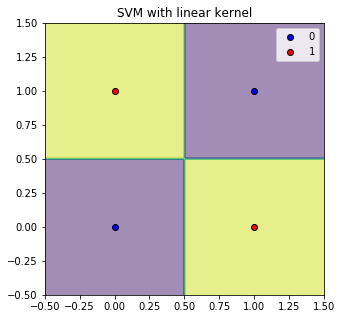

In [330]:
# 이해 안되는 코드는 일단 넘어갈 것
plt.figure(figsize=(5,5))
plt.contourf(XX, YY, ZZ, alpha=.5)
plt.scatter(X[:, 0][:1], X[:, 1][:1], color='blue', edgecolor='k', label=0)
plt.scatter(X[:, 0][1:3], X[:, 1][1:3], color='red', edgecolor='k', label=1)
plt.scatter(X[:, 0][3:], X[:, 1][3:], color='blue', edgecolor='k')
plt.ylim(-.5, 1.5)
plt.xlim(-.5, 1.5)
plt.legend()
plt.title('SVM with linear kernel')
plt.show()

## 사이킷 런 제공 데이터셋 [(링크)](https://scikit-learn.org/stable/datasets/index.html)
**관심 있는 사람은 데이터셋 명세서를 보고, 머신러닝 어떤 분류에 속하나 생각해보기**
* 연습을 위한 토이 데이터셋을 제공함
* 외부 웹사이트에서 따로 다운로드 할 필요 없음
 * 보스턴 집값 데이터
 * 붓꽃 데이터
 * 당뇨 데이터
 * 손글씨 숫자 데이터
 * Linnerud 데이터
 * 와인 분류 데이터
 * 유방암 데이터셋
* 현실 세계 데이터셋도 제공
* 자동으로 해당 데이터가 다운로드 됨
 * AT&T 직원 얼굴 데이터셋
 * 20 뉴스그룹 데이터셋
 * 얼굴 데이터셋
 * 숲 데이터셋
 * 로이터 뉴스 데이터셋
 * 네트워크 데이터셋
 * 캘리포니아 집 데이터셋
* 그외 무작위 데이터 생성 방법도 제공

**수업에서는 붓꽃 데이터로 실습**

In [13]:
# 사이킷 런 제공 데이터 불러오기
iris = datasets.load_iris()

* dir() 내장함수
  * 객체가 가지고 있는 속성 리스트를 보여줌

In [12]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [15]:
# 데이터 설명
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
# 데이터 저장 된 위치
print(iris['filename'])

C:\Users\WoongheeLee\miniconda3\envs\aifs\lib\site-packages\sklearn\datasets\data\iris.csv


In [19]:
# 속성 이름
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
# 타겟 이름
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [24]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [333]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* 변수 이름을 다루기 쉽게 바꿈

In [384]:
X = iris['data']
y = iris['target']

In [335]:
# 둘다 넘파이 배열
X.shape, y.shape

((150, 4), (150,))

## 머신러닝 모델 학습 순서
* 데이터 전처리
  * 속성의 크기를 정규화
  * 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 마다 범위가 제각각임
  * 범위를 일정 범위로 정규화 해주어야 모델 학습에 유리
* 학습 데이터, 테스트 데이터 분리
  * 머신러닝의 목적은 **관측한 데이터**로부터 모델을 학습
  * 학습한 모델로부터 **새로운 데이터**가 무엇인지 알아내는 것
  * 토이 데이터를 임의로 관측 데이터(학습 데이터, training dataset)와 새로운 데이터(테스트 데이터, test dataset)로 분리
* 모델 학습과 예측으로 성능 확인

### 데이터 전처리
* 표준스케일러
* 평균이 0, 표준편차가 1이 되도록 정규화
* 즉 각각의 속성에 대해서,
  * 평균이 $\mu$
  * 표준편차가 $\sigma$라면
  * $z = {(x-\mu) \over \sigma}$ 로 정규화
  * 이 때, $x$는 원래 값, $z$는 정규화 된 값

In [380]:
# 크기를 정규화할 클래스를 생성
scaler = StandardScaler()

# 스케일러가 데이터 크기를 정규화하도록 학습
scaler.fit(X)

# 스케일러에 정규화할 데이터를 넣어줌
X_normalized = scaler.transform(X)

# 통계적 설명
X_stats = stats.describe(X_normalized)
print("평균",X_stats.mean)
print("분산",X_stats.variance)

평균 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
분산 [1.00671141 1.00671141 1.00671141 1.00671141]


## 학습 / 테스트 데이터 분리
* train_test_split(*arrays, test_size, shuffle)
* \*arrays: 인자로 넣은 데이터 개수 만큼 분리해서 튜플로 반환
* test_size: 테스트 데이터의 비율
* shuffle: 섞어줄지 말지

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=.25, shuffle=True)

In [388]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


In [389]:
# 기본 kernel 은 'rbf' 로 모델 학습
svc = SVC().fit(X_train, y_train)

In [390]:
y_pred = svc.predict(X_test)

In [396]:
acc = accuracy_score(y_test, y_pred)

In [399]:
print(f"정확도 = {acc*100:.2f}%")

정확도 = 97.37%
